Data Source : https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data

Reference : https://www.kaggle.com/code/deffro/eda-is-fun

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pd.options.display.max_columns = None

In [4]:
train = pd.read_csv("train_V2.csv")

In [5]:
train.shape

(4446966, 29)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### The killers

In [6]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


In [7]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'

In [8]:
data.groupby(["kills"])["kills"].count()

kills
0     2529722
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8+      33362
Name: kills, dtype: int64

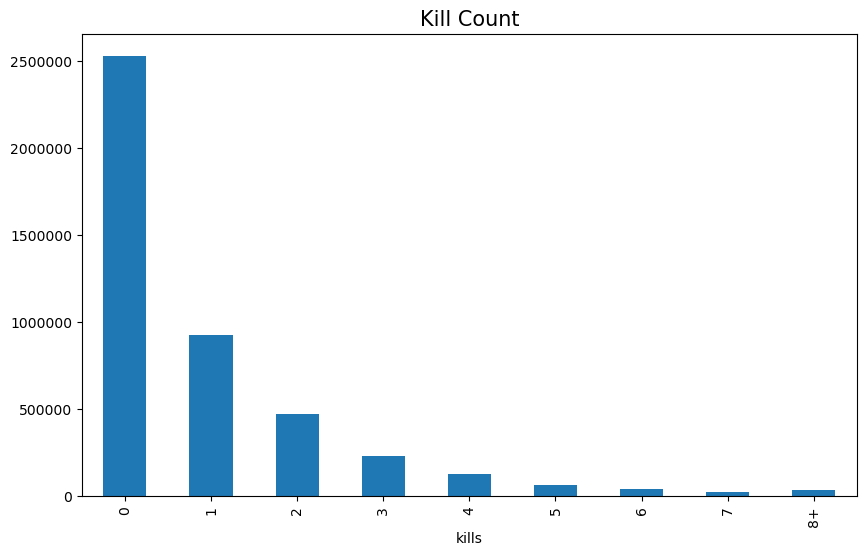

In [13]:
plt.figure(figsize=(10,6))
plt.title("Kill Count",fontsize=15)
data.groupby(["kills"])["kills"].count().plot(kind="bar")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [14]:
data = train.copy()
data = data[data['kills']==0]

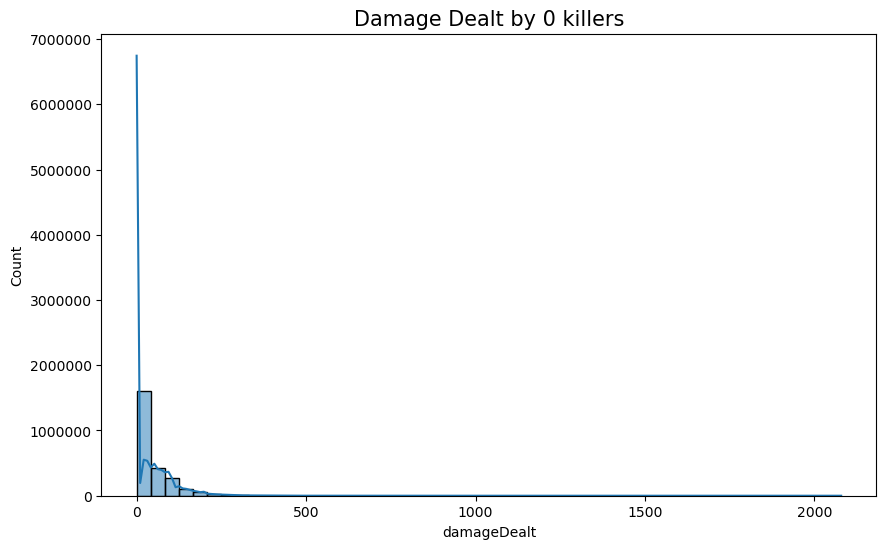

In [15]:
plt.figure(figsize=(10,6))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.histplot(data=data, x="damageDealt", kde=True, bins=50)
plt.ticklabel_format(style='plain', axis='y')
# sns.distplot(data['damageDealt'])
plt.show()

In [18]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))
"\n"
data1 = train[train['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


<Figure size 800x600 with 0 Axes>

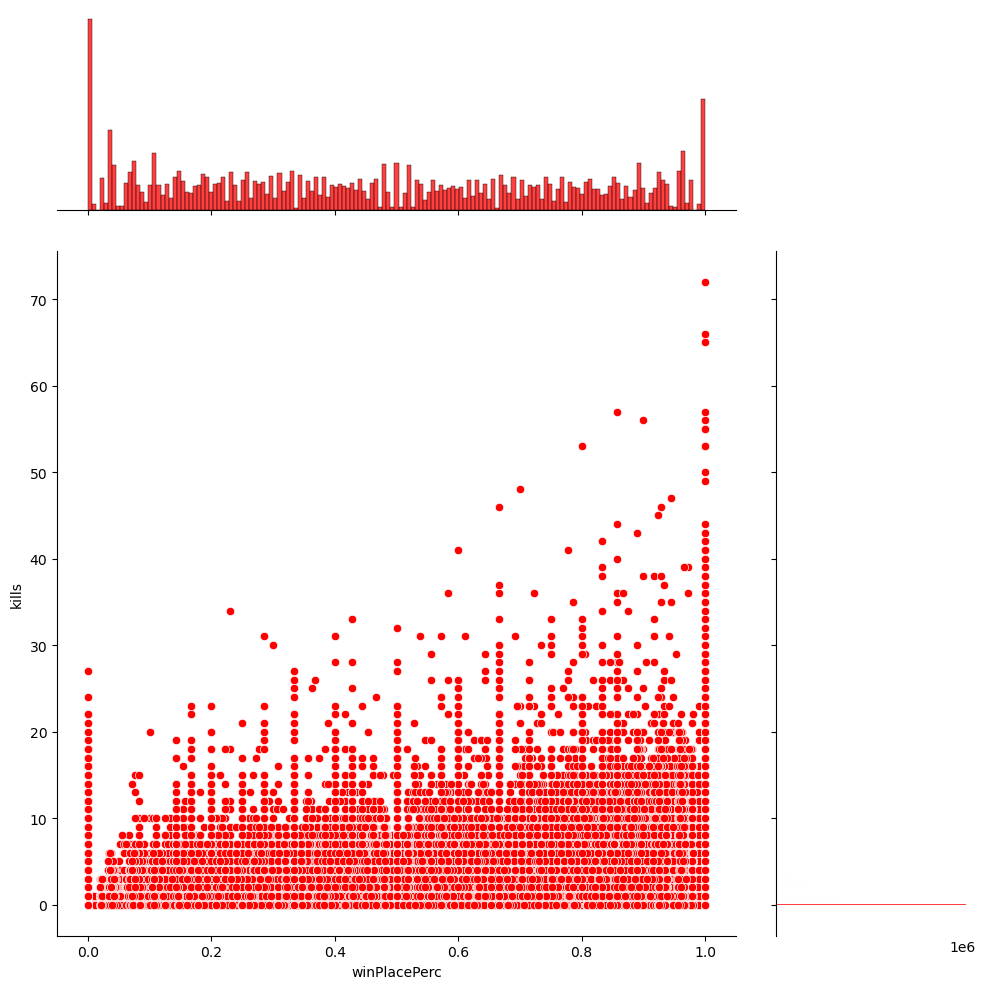

In [19]:
plt.figure(figsize=(8,6))
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="r")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

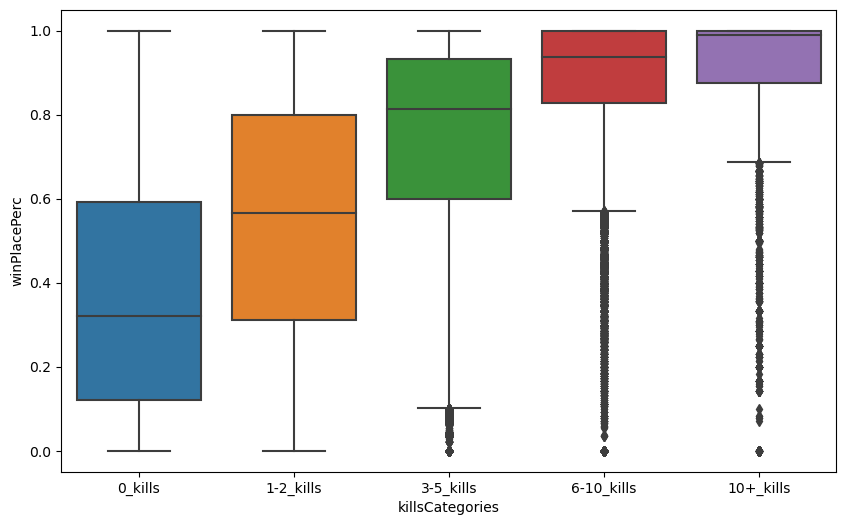

In [20]:
plt.figure(figsize=(10,6))
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

The Runners

In [21]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.


In [22]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]

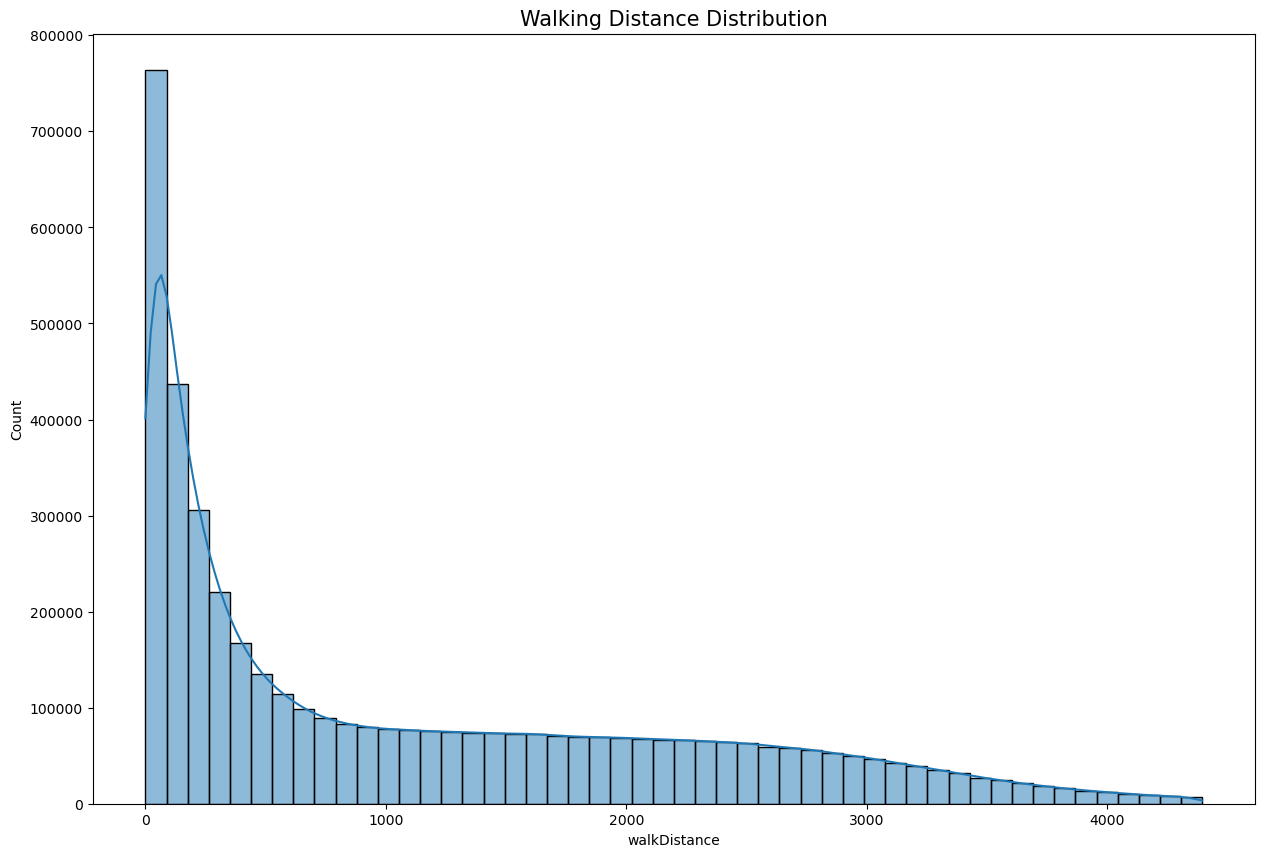

In [23]:
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.histplot(data=data, x="walkDistance", kde=True, bins=50)
# sns.distplot(data['walkDistance'])
plt.show()

In [24]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99603 players (2.0329%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


<Figure size 800x300 with 0 Axes>

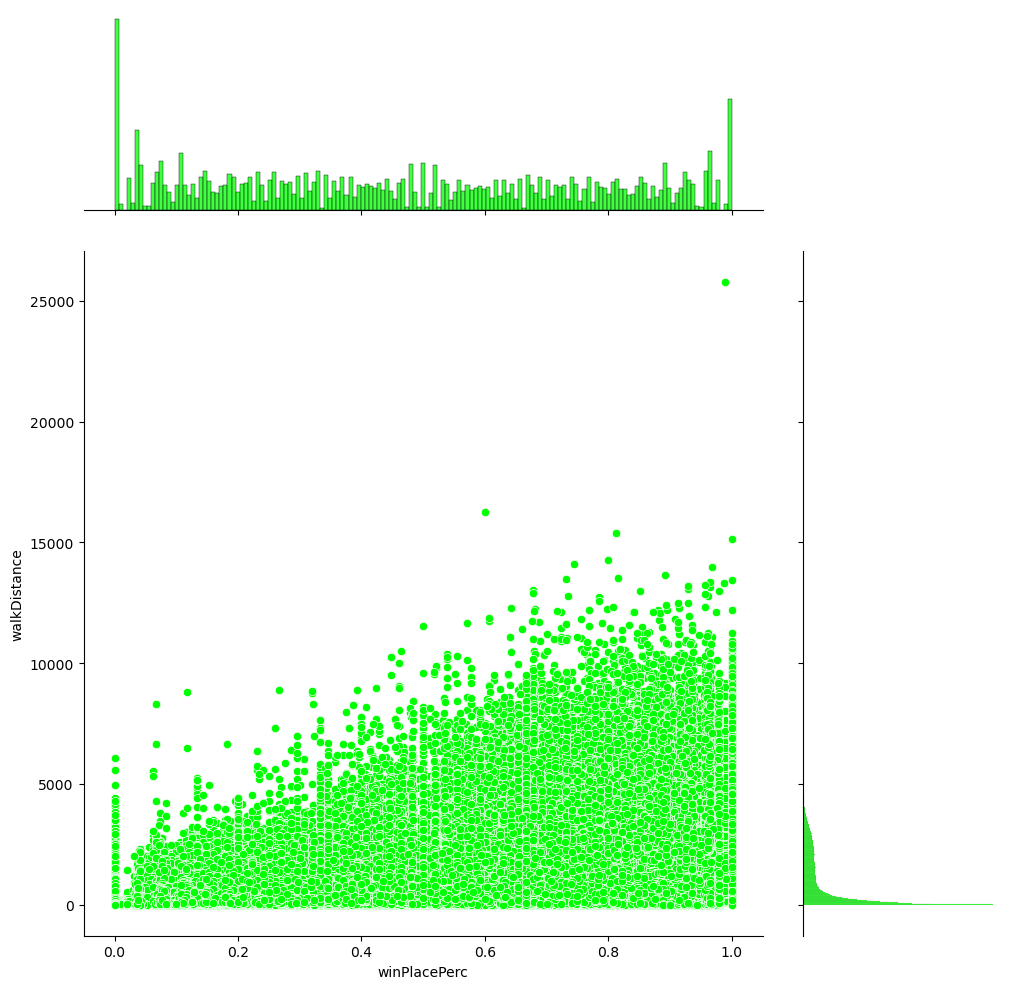

In [25]:
plt.figure(figsize=(8,3))
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

### The Drivers

In [26]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


In [27]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]

In [28]:
data.shape

(4002263, 29)

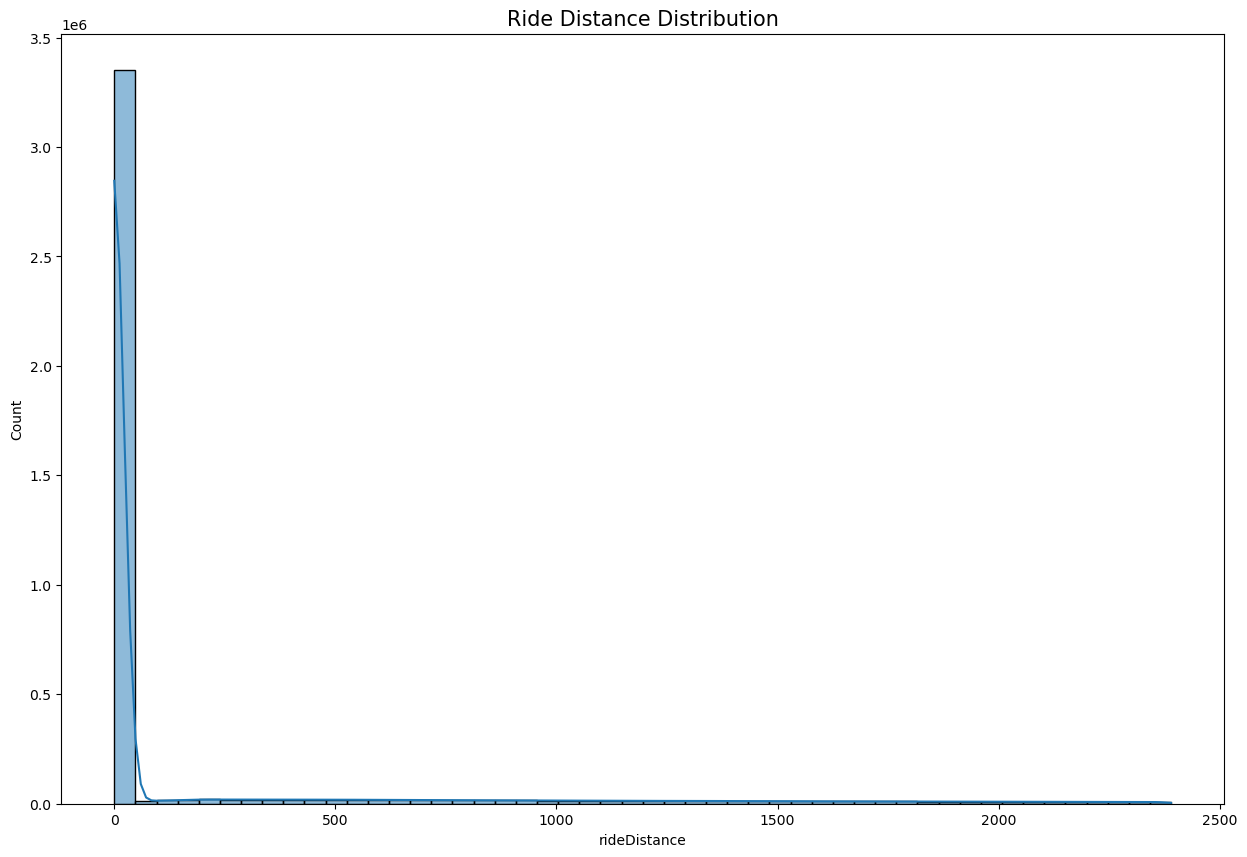

In [29]:
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.histplot(data=data, x="rideDistance", kde=True, bins=50)
# sns.distplot(data['rideDistance'])
plt.show()

In [30]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

3309429 players (23.1022%) drived for 0 meters. This means that they don't have a driving licence yet.


<Figure size 600x400 with 0 Axes>

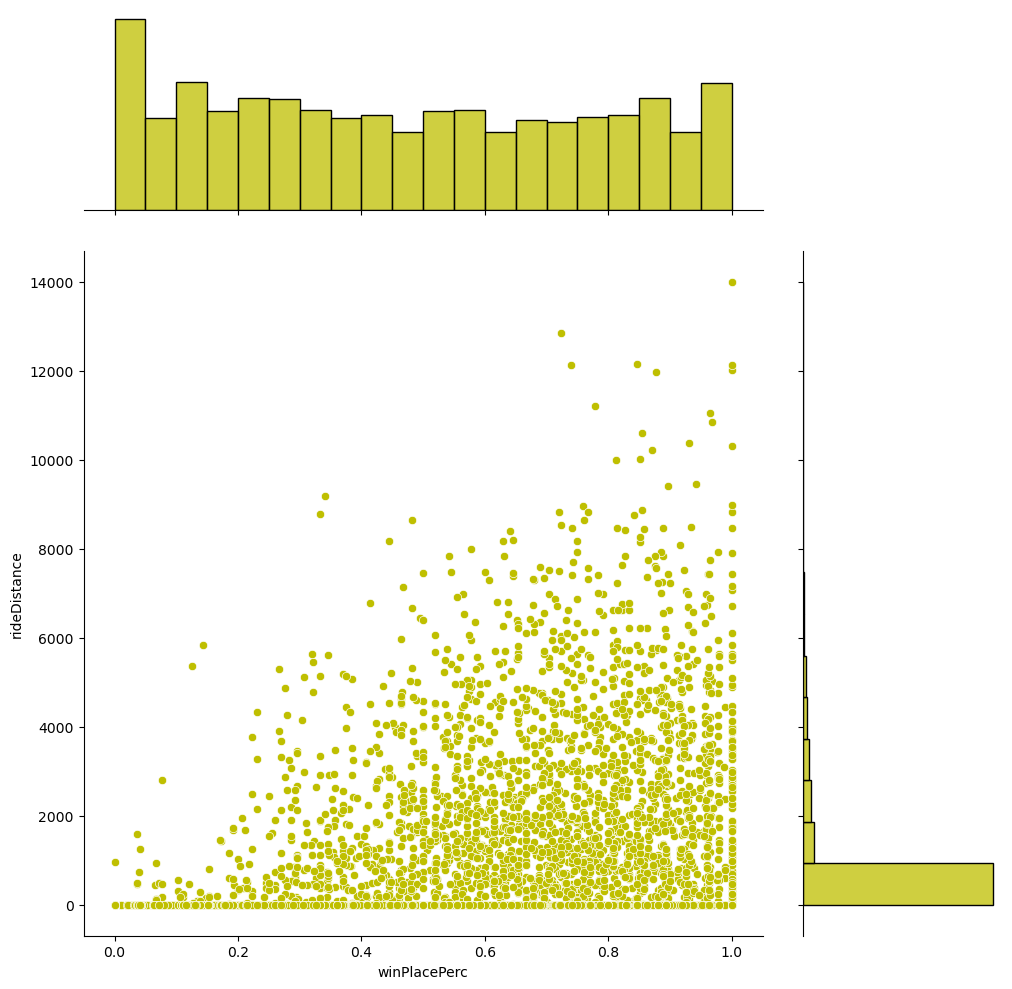

In [31]:
plt.figure(figsize=(6,4))
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train.sample(10000, random_state=42), height=10, ratio=3, color="y")
plt.show()

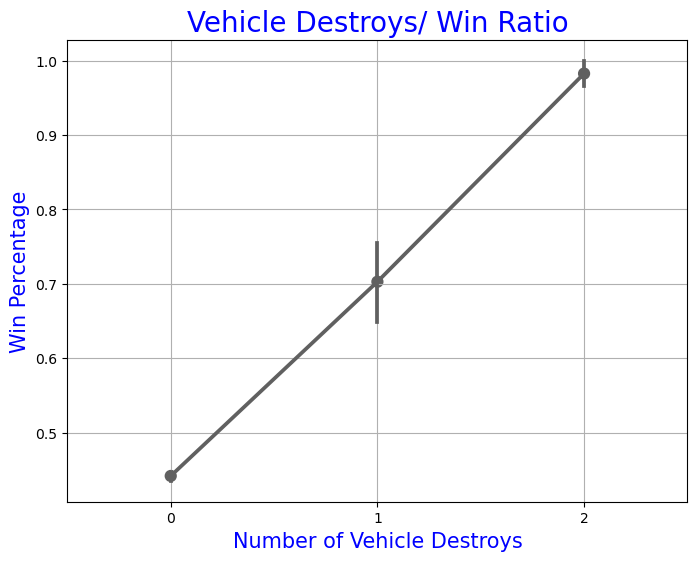

In [32]:
f,ax1 = plt.subplots(figsize =(8,6))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data.sample(10000, random_state=42),color='#606060')
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

### The Swimmers

In [33]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


In [34]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]

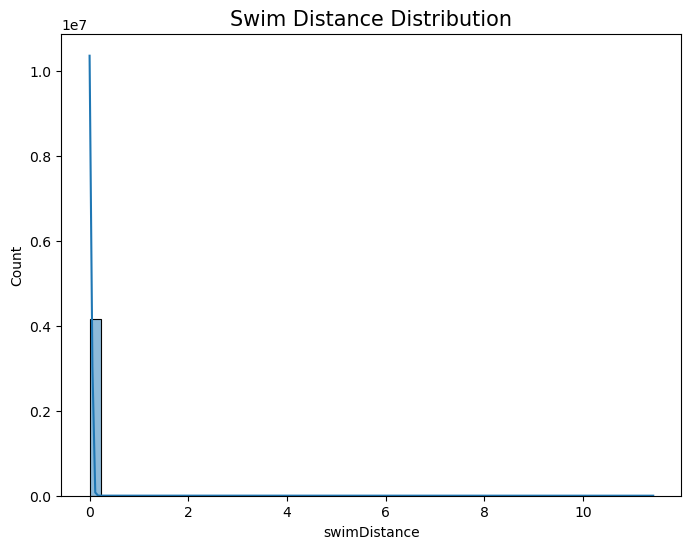

In [35]:
plt.figure(figsize=(8,6))
plt.title("Swim Distance Distribution",fontsize=15)
sns.histplot(data=data, x="swimDistance", kde=True, bins=50)
# sns.distplot(data['swimDistance'])
plt.show()

In [36]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

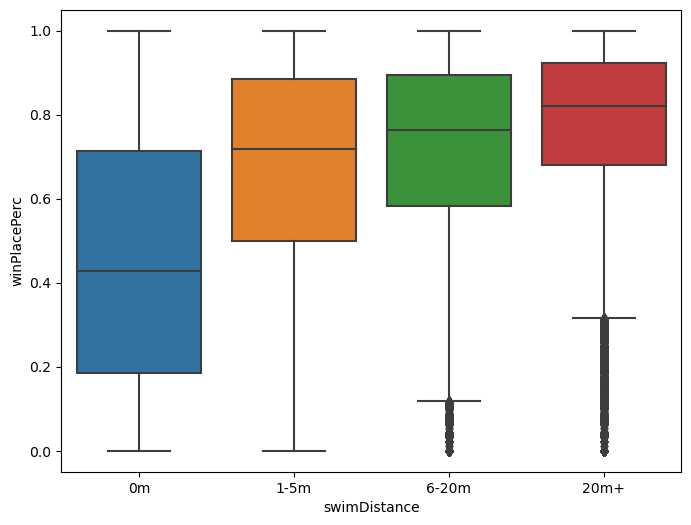

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

### The Healers

In [38]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


In [39]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

In [40]:
data.shape

(4325704, 29)

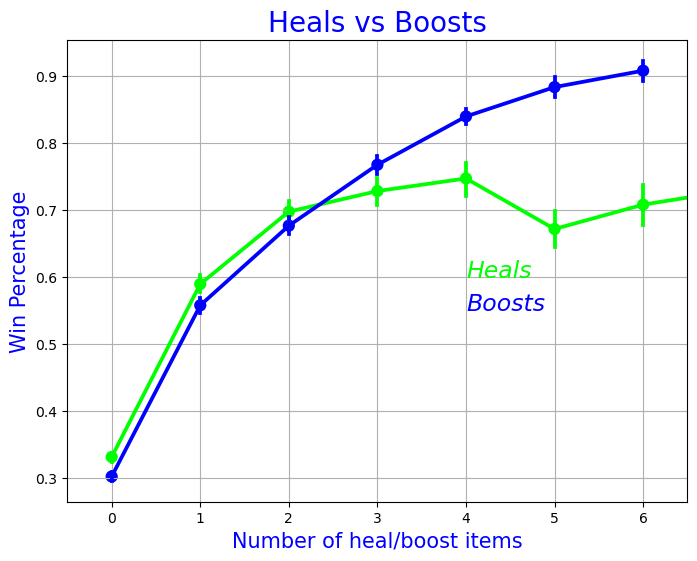

In [41]:
f,ax1 = plt.subplots(figsize =(8,6))
sns.pointplot(x='heals',y='winPlacePerc',data=data.sample(10000,random_state=42),color='lime')
sns.pointplot(x='boosts',y='winPlacePerc',data=data.sample(10000,random_state=42),color='blue')
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

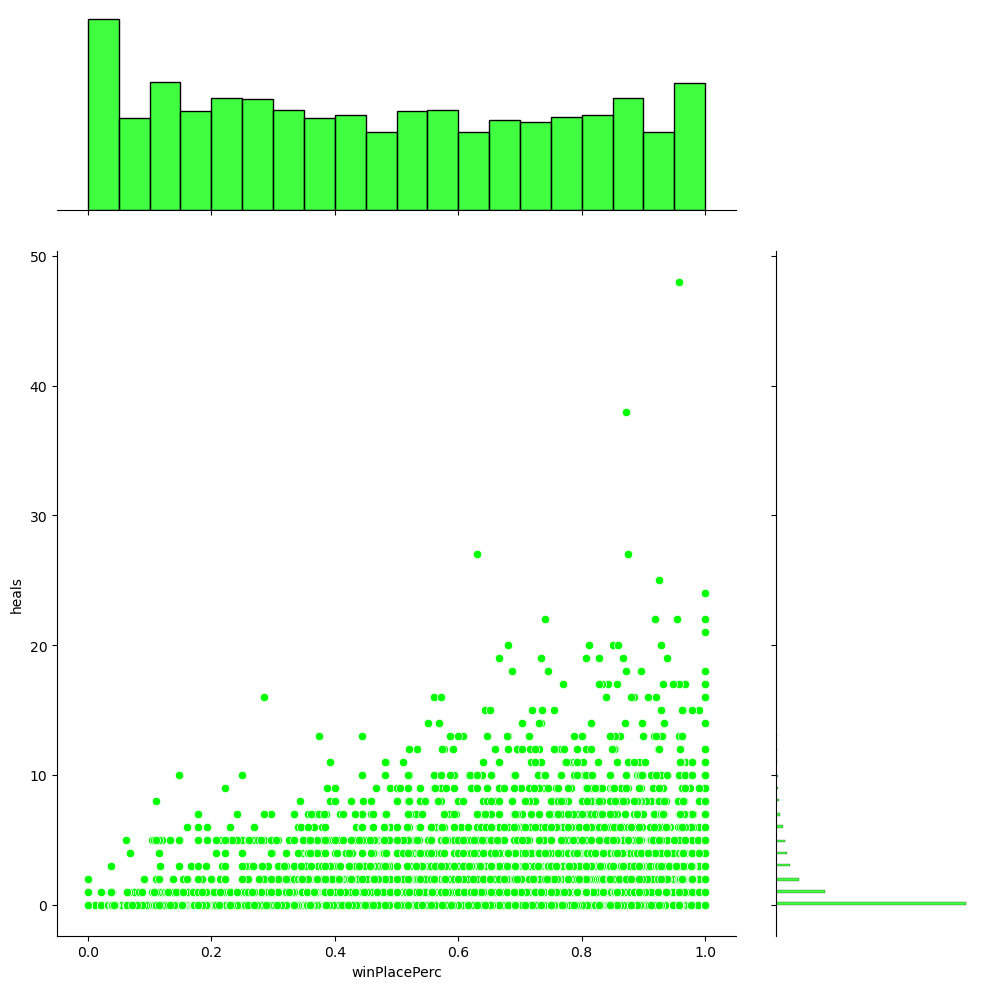

In [42]:
sns.jointplot(x="winPlacePerc", y="heals", data=train.sample(10000,random_state=42), height=10, ratio=3, color="lime")
plt.show()

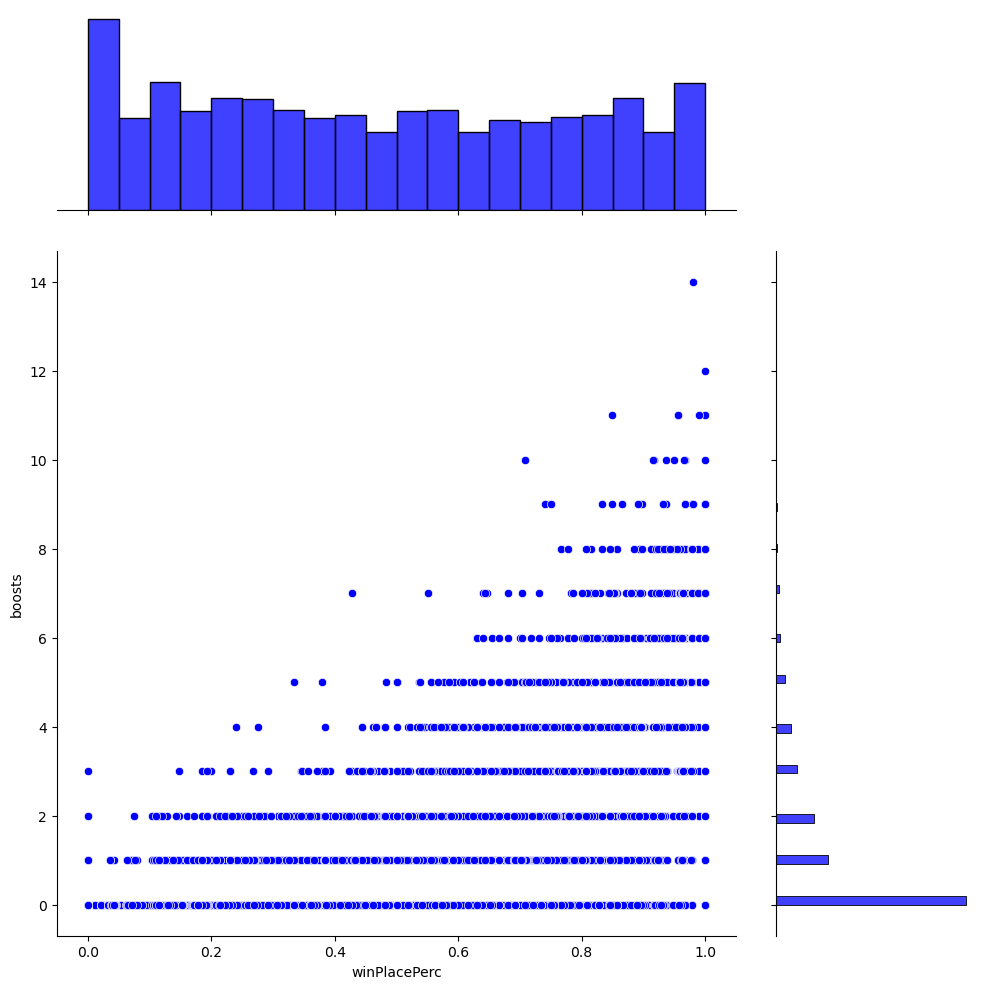

In [43]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train.sample(10000,random_state=42), height=10, ratio=3, color="blue")
plt.show()

### Solos, Duos and Squads
* 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.
* 4인팀 게임이면 한 판에 100명 정원에서 25팀, 2인팀 게임이면 50팀

In [50]:
solos = train[train["numGroups"] > 50]
solos.shape

(709111, 29)

In [47]:
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
duos.shape

(3295326, 29)

In [48]:
squads = train[train['numGroups']<=25]
squads.shape

(442529, 29)

In [51]:
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


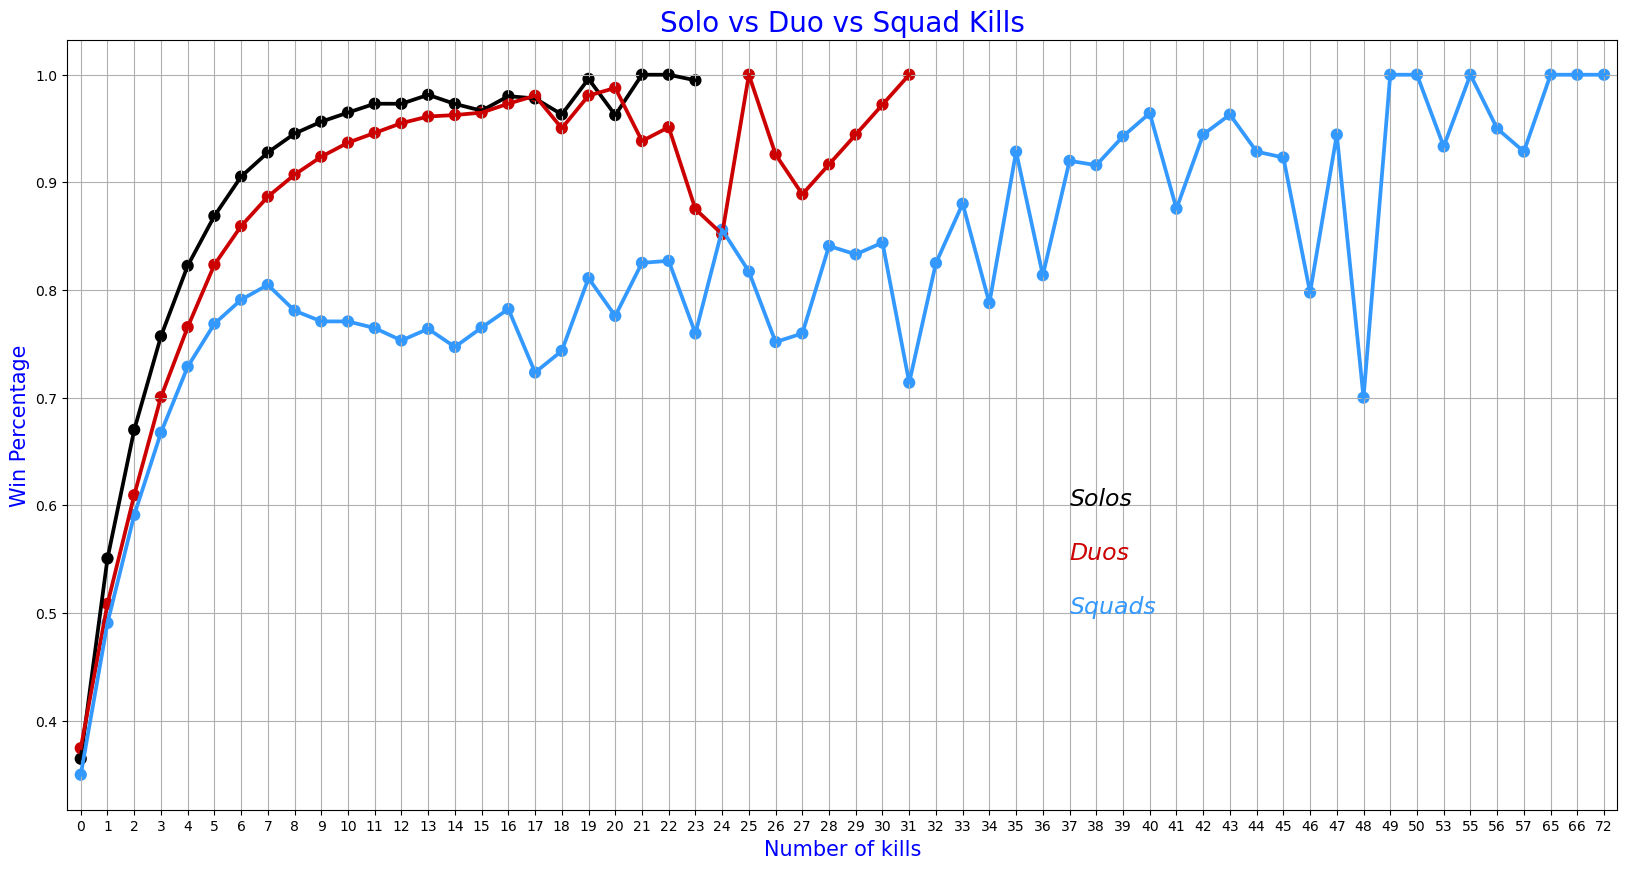

In [71]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',dodge=0.8, errorbar=None)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',dodge=0.8, errorbar=None)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',dodge=0.8, errorbar=None)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

* DBNOs : Down But No Out
    * 2인이나 4인일 경우 팀원이 살아있을 때 바로 죽지 않고 기절한다(DBNO) 이때 팀원이 치료를 해주면(assist) 다시 살아난다(revive)

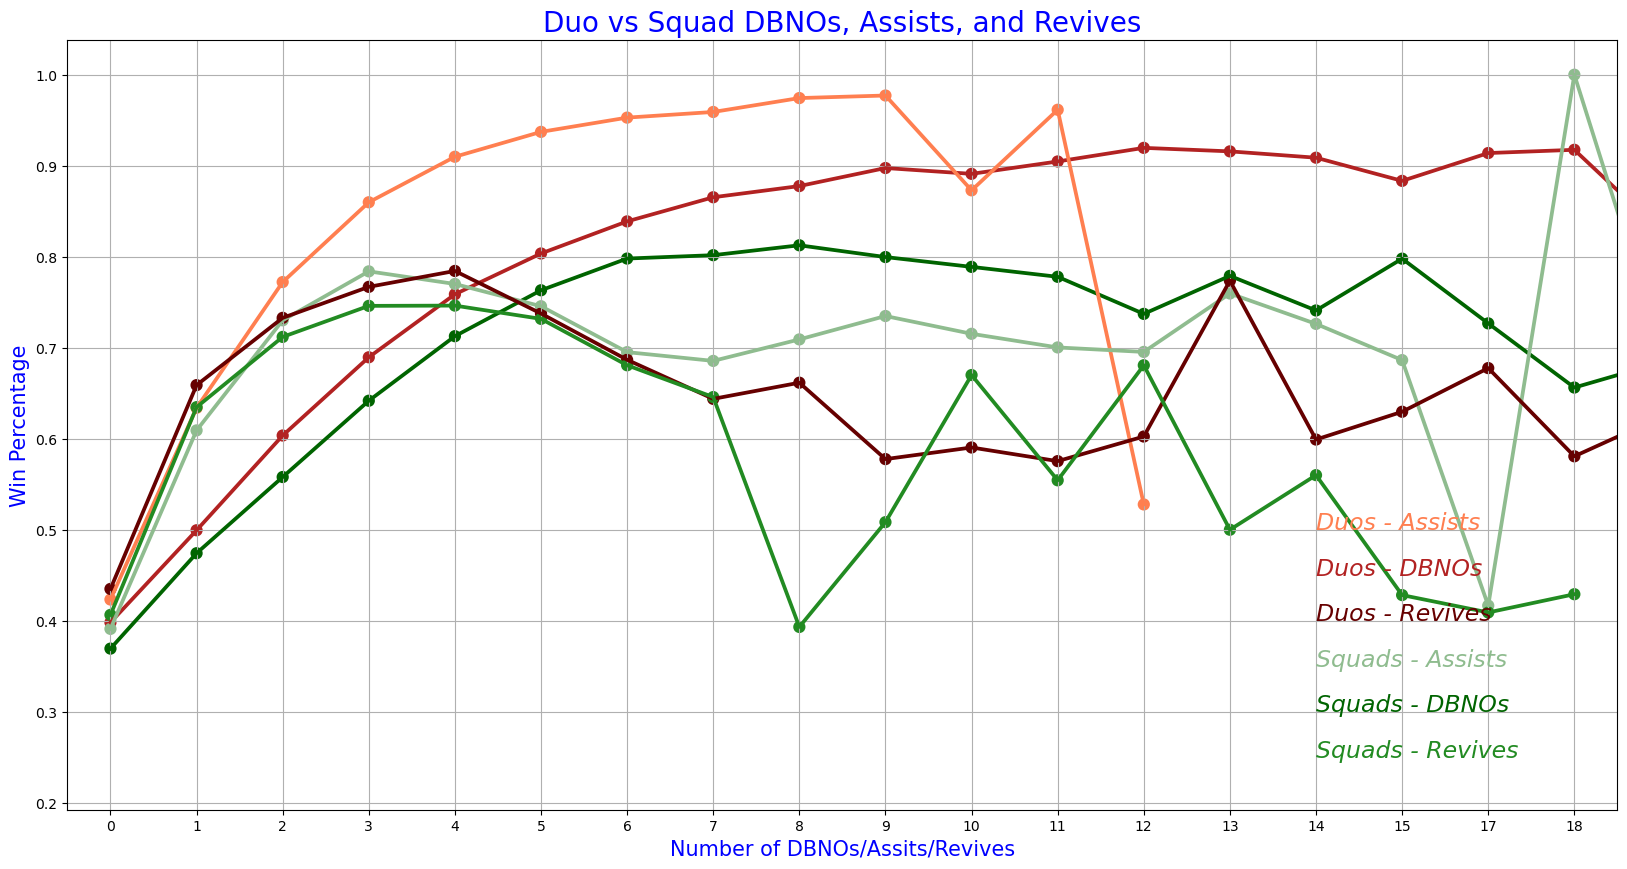

In [74]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#B22222',dodge=0.8, errorbar=None)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#006400',dodge=0.8, errorbar=None)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF7F50',dodge=0.8, errorbar=None)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#8FBC8F',dodge=0.8, errorbar=None)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',dodge=0.8, errorbar=None)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#228B22',dodge=0.8, errorbar=None)
plt.text(14,0.5,'Duos - Assists',color='#FF7F50',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#B22222',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#8FBC8F',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#006400',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#228B22',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Pearson correlation between variables

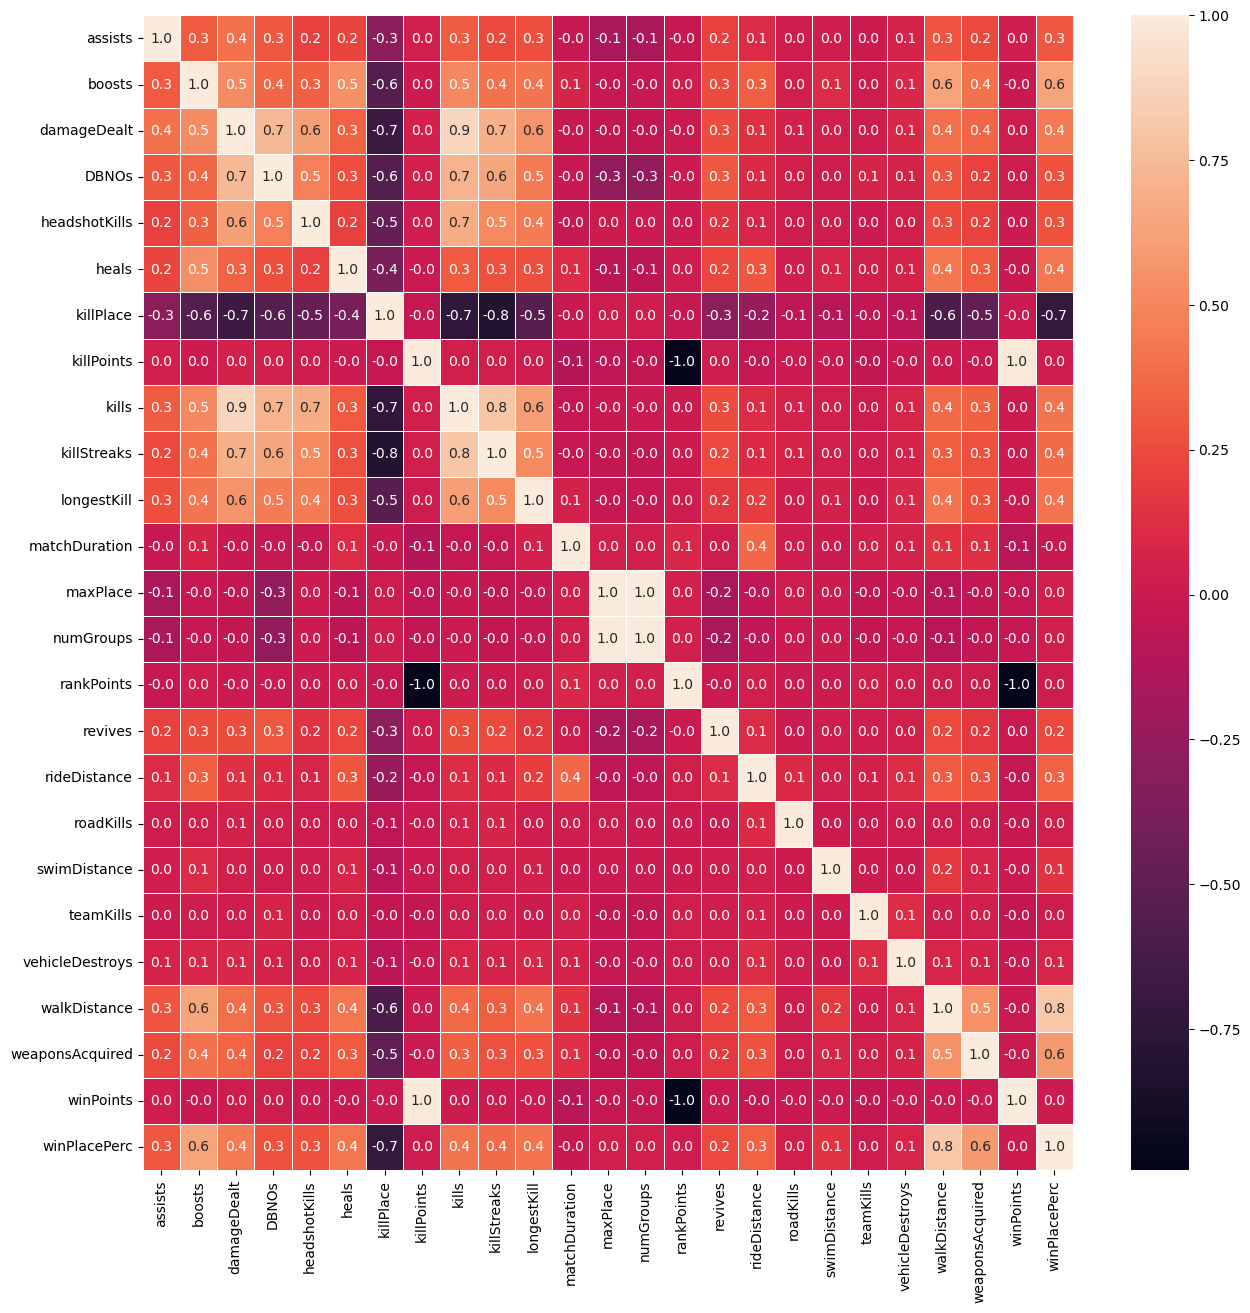

In [75]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [24]:
correlation = train.corr()['winPlacePerc'].sort_values(ascending = False)
# correlation
cols = correlation[:5].index
cols

Index(['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'damageDealt'],
      dtype='object')

<AxesSubplot:>

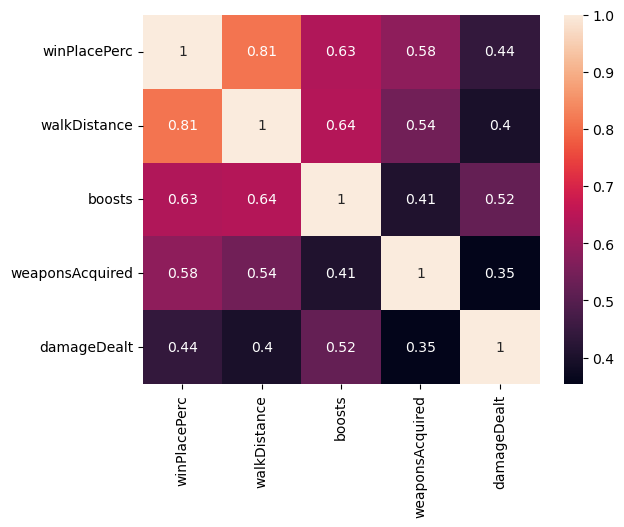

In [25]:
cols = correlation[:5].index
sns.heatmap(train[cols].corr(), annot=True)

In [26]:
# # k = 5 #number of variables for heatmap
# f,ax = plt.subplots(figsize=(11, 11))
# cols = correlation[:6].index
# cm = np.corrcoef(train[cols].values.T)
# # sns.set(font_scale=1.25)
# sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# # plt.show()

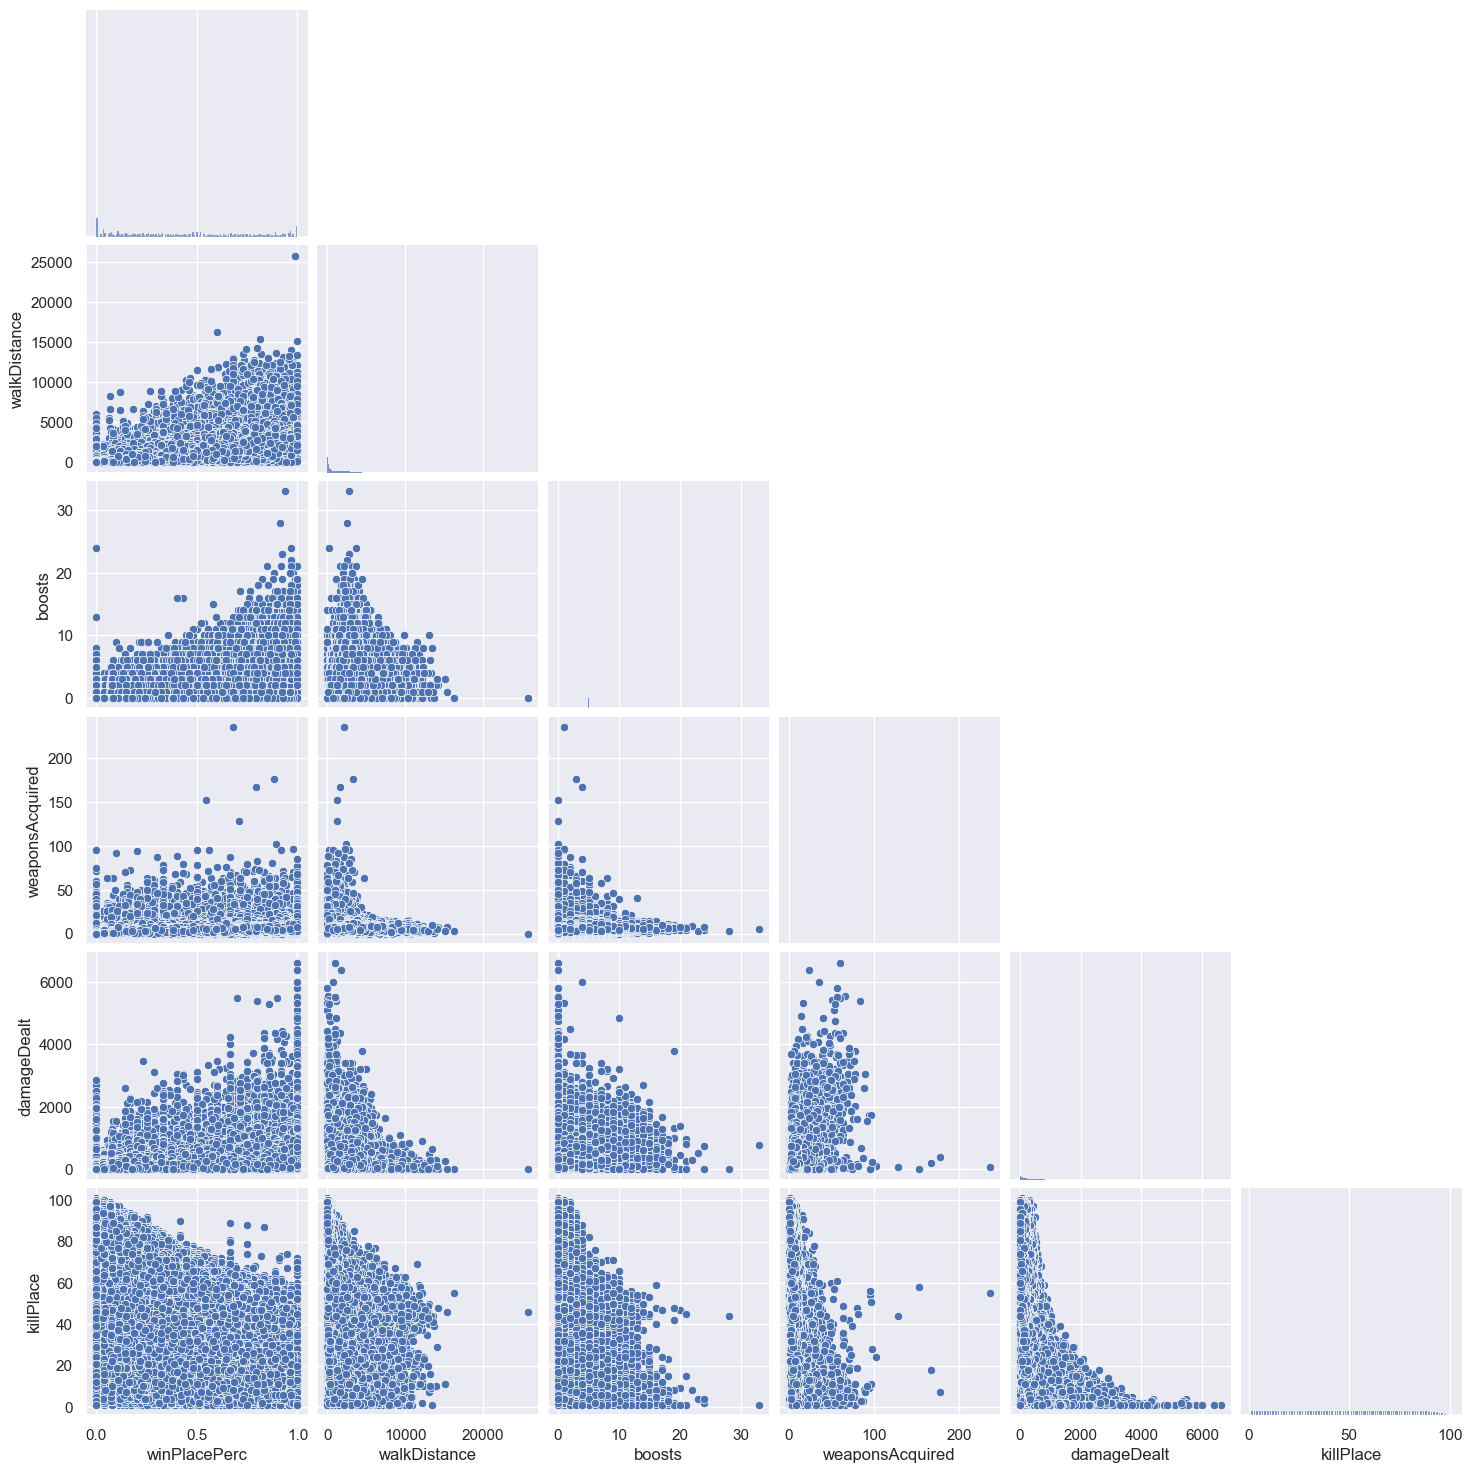

In [87]:
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(data=train, x_vars=cols,y_vars=cols, height = 2.5, corner=True)